In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df1 = pd.read_csv('cars.csv')

## Tirando uma amostragem de 25%
###  salvando para usar posteriormente

In [3]:
car_dataset = df1.sample(frac=0.25, random_state=1)

In [4]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 190523 entries, 456056 to 559392
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   manufacturer         190523 non-null  object 
 1   model                190523 non-null  object 
 2   year                 190523 non-null  int64  
 3   mileage              190403 non-null  float64
 4   engine               186724 non-null  object 
 5   transmission         188036 non-null  object 
 6   drivetrain           185161 non-null  object 
 7   fuel_type            184720 non-null  object 
 8   mpg                  154790 non-null  object 
 9   exterior_color       188314 non-null  object 
 10  interior_color       176409 non-null  object 
 11  accidents_or_damage  184474 non-null  float64
 12  one_owner            182675 non-null  float64
 13  personal_use_only    184325 non-null  float64
 14  seller_name          188306 non-null  object 
 15  seller_rating    

In [5]:
#salvando a amostra para importala , optei por fazer assim pois garante a integridade dos dados
#car_dataset.to_csv('Car_amostra.csv', index = False)

## Visualizando e Tratando.

In [6]:
Car_Amostra = pd.read_csv('Car_amostra.csv')

In [7]:
Car_Amostra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190523 entries, 0 to 190522
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   manufacturer         190523 non-null  object 
 1   model                190523 non-null  object 
 2   year                 190523 non-null  int64  
 3   mileage              190403 non-null  float64
 4   engine               186724 non-null  object 
 5   transmission         188036 non-null  object 
 6   drivetrain           185161 non-null  object 
 7   fuel_type            184720 non-null  object 
 8   mpg                  154790 non-null  object 
 9   exterior_color       188314 non-null  object 
 10  interior_color       176409 non-null  object 
 11  accidents_or_damage  184474 non-null  float64
 12  one_owner            182675 non-null  float64
 13  personal_use_only    184325 non-null  float64
 14  seller_name          188306 non-null  object 
 15  seller_rating    

In [8]:
Car_Amostra.describe()

,year,mileage,accidents_or_damage,one_owner,personal_use_only,seller_rating,driver_rating,driver_reviews_num,price_drop,price
count,190523.000000,190403.000000,184474.000000,182675.000000,184325.000000,137082.000000,182603.000000,190523.000000,102644.000000,1.905230e+05
mean,2017.812112,55719.122971,0.229669,0.561768,0.657632,4.160481,4.623686,89.429145,1009.271502,4.308581e+04
std,5.041562,43625.793000,0.420621,0.496171,0.474503,0.804897,0.276308,114.995311,1309.597297,3.239942e+06
min,1923.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,100.000000,3.190000e+02
25%,2016.000000,23177.500000,0.000000,0.000000,0.000000,3.800000,4.500000,14.000000,384.000000,1.958800e+04
50%,2019.000000,45468.000000,0.000000,1.000000,1.000000,4.500000,4.700000,51.000000,645.000000,2.799500e+04
75%,2021.000000,78427.500000,0.000000,1.000000,1.000000,4.700000,4.800000,119.000000,1009.000000,3.950000e+04
max,2023.000000,999999.000000,1.000000,1.000000,1.000000,5.000000,5.000000,1025.000000,79909.000000,1.000000e+09


In [9]:
#foi identificado um valor insconsistente de 1.000.000.000(1.000000e+09 (bilhao))
Car_Amostra.loc[Car_Amostra['price'] >= 1.000000e+09]

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
86379,Dodge,Durango Citadel,2018,113207.0,3.6L V6 24V MPFI DOHC,8-Speed Automatic,All-wheel Drive,Gasoline,18-25,DB Black Clearcoat,Black,0.0,1.0,1.0,"Rothrock Nissan, Chrysler, Dodge, Jeep, RAM",4.6,4.8,146.0,NaN,1.000000e+09
141824,Chevrolet,Cobalt LT,2009,85185.0,2.2L I4 16V MPFI DOHC,4-Speed Automatic,Front-wheel Drive,Gasoline,NaN,Black,Gray,0.0,1.0,1.0,"Rothrock Nissan, Chrysler, Dodge, Jeep, RAM",4.6,4.2,90.0,NaN,1.000000e+09


In [10]:
# tratando dados incosistente
Car_Amostra = Car_Amostra.drop([86379,141824])

In [11]:
# confirmando a exclução dos dados
Car_Amostra.loc[Car_Amostra['price'] >= 1.000000e+09]

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price


In [12]:
Car_Amostra.head(1)

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
0,Land Rover,Range Rover Sport HSE Dynamic,2018,33585.0,V6,Automatic,Four-wheel Drive,Gasoline,17-23,Santorini Black,Ebony,0.0,1.0,0.0,Schaumburg Ford,4.1,4.0,45.0,500.0,53950.0


#### 7963 Modelos Unicos

In [13]:
#Identificando valores unicos
Car_Amostra['model'].value_counts()

model
Fusion SE                          774
Corolla LE                         742
Sportage LX                        691
Sentra SV                          682
GLC 300 Base 4MATIC                657
                                  ... 
Outlander SE Launch Edition 2WD      1
Sunliner CONVERTABLE                 1
Land Cruiser V8 (A8)                 1
S60 T5 Platinum                      1
S-Type 4.0                           1
Name: count, Length: 7963, dtype: int64

#### 30 Fabricantes Unicas

In [14]:
Car_Amostra['manufacturer'].value_counts()

manufacturer
Ford             19828
Toyota           14880
Chevrolet        13898
Nissan           12123
Jeep             10458
Mercedes-Benz    10147
Honda             9416
BMW               9264
Kia               8832
GMC               7325
Dodge             6321
Subaru            6175
Volkswagen        6157
Hyundai           5487
Lexus             5283
RAM               4935
Audi              4474
Cadillac          4468
Mazda             3893
Buick             3623
INFINITI          3192
Chrysler          3166
Land Rover        3049
Porsche           2973
Lincoln           2649
Volvo             2537
Acura             2098
Mitsubishi        1498
Tesla             1485
Jaguar             887
Name: count, dtype: int64

#### foi indentificado muito dados duplicados , porem nao sera necessario a exclusão pois pode comprometer a integridade dos dados 

In [15]:
Car_Amostra[Car_Amostra.model.duplicated()]

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
61,RAM,1500 Big Horn,2020,64114.0,3.6L V6 24V MPFI DOHC,8-Speed Automatic,Four-wheel Drive,Gasoline,19-24,Bright White Clearcoat,Black,0.0,1.0,1.0,Ingersoll Auto of Pawling,5.0,4.8,207.0,700.0,32750.0
99,Mercedes-Benz,C-Class C 300,2015,31790.0,2.0L I4 16V GDI DOHC Turbo,7-Speed Automatic,All-wheel Drive,Gasoline,24-31,White,Black,1.0,0.0,0.0,Serpentini Chevrolet Willoughby,4.2,4.7,122.0,267.0,22995.0
103,Mazda,CX-5 Touring,2020,29199.0,2.5L I4 16V GDI DOHC,6-Speed Automatic,All-wheel Drive,Gasoline,24-30,Snowflake White Pearl,Black,0.0,1.0,1.0,Koeppel Mazda,4.1,4.9,140.0,NaN,24688.0
105,INFINITI,QX60 Luxe,2020,71255.0,3.5L V6 24V GDI DOHC,Automatic CVT,All-wheel Drive,Gasoline,19-26,Black Obsidian,Graphite,0.0,1.0,0.0,Beaman Dodge Chrysler Jeep RAM,2.6,4.8,39.0,400.0,29520.0
133,Toyota,Camry SE,2012,114954.0,3.5L V6 24V MPFI DOHC,6-Speed Automatic,Front-wheel Drive,Gasoline,21-30,White,Black,0.0,1.0,1.0,2 Manny's Auto Sales,4.1,4.5,292.0,NaN,12995.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190518,Hyundai,Elantra SE,2017,52900.0,"Nu 2L I-4 DOHC, D-CVVT variable valve control,...",6-Speed Automatic,Front-wheel Drive,Gasoline,29-38,Lakeside Blue,Gray,0.0,0.0,0.0,Bommarito Nissan Hazelwood,4.8,4.7,640.0,NaN,16995.0
190519,RAM,ProMaster 1500 Low Roof,2015,45195.0,3.0L I4 16V DDI DOHC Turbo Diesel,Automatic,Front-wheel Drive,Diesel,NaN,Bright White Clearcoat,Gray,0.0,0.0,1.0,Woody's Dodge Jeep Chrysler RAM,4.6,4.1,5.0,NaN,54870.0
190520,Toyota,Highlander,2013,160000.0,3.5L V6 24V MPFI DOHC,5-Speed Automatic,All-wheel Drive,Gasoline,17-22,White,Beige,0.0,1.0,1.0,Trade Guru,3.4,4.7,140.0,NaN,13991.0
190521,GMC,Yukon XL Denali,2016,102462.0,6.2L V8 16V GDI OHV,8-Speed Automatic,Rear-wheel Drive,Gasoline,15-22,Onyx Black,Jet Black,0.0,0.0,1.0,Murray Ford Superstore,4.8,4.7,26.0,213.0,32777.0


In [16]:
Car_Amostra.model.duplicated().sum()

182558

In [17]:
Car_Amostra.engine.duplicated().sum()

186618

In [18]:
# Dropando a coluna 'price_drop', pois nao sera considerada relevante
Car_Amostra = Car_Amostra.drop(columns = ['price_drop'])

In [19]:
Car_Amostra.isnull().sum()

manufacturer               0
model                      0
year                       0
mileage                  120
engine                  3799
transmission            2487
drivetrain              5362
fuel_type               5803
mpg                    35732
exterior_color          2209
interior_color         14114
accidents_or_damage     6049
one_owner               7848
personal_use_only       6198
seller_name             2217
seller_rating          53441
driver_rating           7920
driver_reviews_num         0
price                      0
dtype: int64

In [20]:
(Car_Amostra.isnull().sum()/len(Car_Amostra)*100).sort_values(ascending = False)

seller_rating          28.049926
mpg                    18.754888
interior_color          7.408107
driver_rating           4.157022
one_owner               4.119231
personal_use_only       3.253185
accidents_or_damage     3.174978
fuel_type               3.045858
drivetrain              2.814388
engine                  1.994006
transmission            1.305368
seller_name             1.163651
exterior_color          1.159452
mileage                 0.062985
driver_reviews_num      0.000000
manufacturer            0.000000
model                   0.000000
year                    0.000000
price                   0.000000
dtype: float64

In [21]:
Car_Amostra.dtypes

manufacturer            object
model                   object
year                     int64
mileage                float64
engine                  object
transmission            object
drivetrain              object
fuel_type               object
mpg                     object
exterior_color          object
interior_color          object
accidents_or_damage    float64
one_owner              float64
personal_use_only      float64
seller_name             object
seller_rating          float64
driver_rating          float64
driver_reviews_num     float64
price                  float64
dtype: object

In [22]:
# convertendo todos os atributos de strings para minusculo para padronizar os textos
Car_Amostra = Car_Amostra.apply(lambda s: s.str.lower() if s.dtype == 'object' else s)

In [23]:
Car_Amostra.head(1)

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price
0,land rover,range rover sport hse dynamic,2018,33585.0,v6,automatic,four-wheel drive,gasoline,17-23,santorini black,ebony,0.0,1.0,0.0,schaumburg ford,4.1,4.0,45.0,53950.0


In [24]:
# Adicionando uma coluna 'id' ao DataFrame
Car_Amostra.insert(0, 'id', range(1, len(Car_Amostra) + 1))

# Definindo a coluna 'id' como o índice das linhas
Car_Amostra.set_index('id', inplace=True)

In [25]:
Car_Amostra

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price
id,,,,,,,,,,,,,,,,,,,
1,land rover,range rover sport hse dynamic,2018,33585.0,v6,automatic,four-wheel drive,gasoline,17-23,santorini black,ebony,0.0,1.0,0.0,schaumburg ford,4.1,4.0,45.0,53950.0
2,nissan,armada sl,2017,63009.0,5.6l v8 32v gdi dohc,7-speed automatic,rear-wheel drive,gasoline,14-19,black,almond,0.0,0.0,1.0,world auto inc.,2.3,4.7,78.0,27885.0
3,toyota,tundra 1794,2018,51316.0,"i-force 5.7l v-8 dohc, vvt-i variable valve co...",automatic,four-wheel drive,gasoline,13-17,silver,brown/black,0.0,NaN,1.0,cal cars,4.4,4.8,199.0,46995.0
4,toyota,avalon xle,2015,89444.0,3.5l v6 24v mpfi dohc,6-speed automatic,front-wheel drive,gasoline,21-31,cosmic gray mica,light gray,0.0,1.0,1.0,scanlon lexus,4.7,4.7,74.0,17987.0
5,mercedes-benz,gls 450 4matic,2023,2191.0,3.0l i6 24v gdi dohc turbo,9-speed automatic,all-wheel drive,gasoline,NaN,2191,tartufo brown,0.0,1.0,1.0,lupient buick gmc,4.5,NaN,0.0,96648.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190517,hyundai,elantra se,2017,52900.0,"nu 2l i-4 dohc, d-cvvt variable valve control,...",6-speed automatic,front-wheel drive,gasoline,29-38,lakeside blue,gray,0.0,0.0,0.0,bommarito nissan hazelwood,4.8,4.7,640.0,16995.0
190518,ram,promaster 1500 low roof,2015,45195.0,3.0l i4 16v ddi dohc turbo diesel,automatic,front-wheel drive,diesel,NaN,bright white clearcoat,gray,0.0,0.0,1.0,woody's dodge jeep chrysler ram,4.6,4.1,5.0,54870.0
190519,toyota,highlander,2013,160000.0,3.5l v6 24v mpfi dohc,5-speed automatic,all-wheel drive,gasoline,17-22,white,beige,0.0,1.0,1.0,trade guru,3.4,4.7,140.0,13991.0


In [26]:
Car_Amostra.dtypes

manufacturer            object
model                   object
year                     int64
mileage                float64
engine                  object
transmission            object
drivetrain              object
fuel_type               object
mpg                     object
exterior_color          object
interior_color          object
accidents_or_damage    float64
one_owner              float64
personal_use_only      float64
seller_name             object
seller_rating          float64
driver_rating          float64
driver_reviews_num     float64
price                  float64
dtype: object

In [27]:
# porcentagem de dados nulos por coluna
(Car_Amostra.isnull().sum()/len(Car_Amostra)*100).sort_values(ascending = False)

seller_rating          28.049926
mpg                    18.754888
interior_color          7.408107
driver_rating           4.157022
one_owner               4.119231
personal_use_only       3.253185
accidents_or_damage     3.174978
fuel_type               3.045858
drivetrain              2.814388
engine                  1.994006
transmission            1.305368
seller_name             1.163651
exterior_color          1.159452
mileage                 0.062985
driver_reviews_num      0.000000
manufacturer            0.000000
model                   0.000000
year                    0.000000
price                   0.000000
dtype: float64

In [28]:
Car_Amostra['fuel_type'].value_counts()

fuel_type
gasoline                         161116
hybrid                             7270
diesel                             7044
e85 flex fuel                      4641
electric                           4033
b                                   348
flexible fuel                       125
plug-in hybrid                       30
gasoline fuel                        29
gasoline/mild electric hybrid        20
regular unleaded                     13
g                                    12
premium unleaded                     11
compressed natural gas                6
unspecified                           6
gaseous                               2
hydrogen fuel cell                    2
electric fuel system                  2
biodiesel                             1
hybrid fuel                           1
diesel fuel                           1
natural gas                           1
gas                                   1
phev                                  1
gas/electric hybrid           

In [29]:
# seperando as variaveis numericas e categorial
numericas = Car_Amostra.select_dtypes(include=['number'])
categoricas = Car_Amostra.select_dtypes(exclude=['number'])

In [30]:
numericas

,year,mileage,accidents_or_damage,one_owner,personal_use_only,seller_rating,driver_rating,driver_reviews_num,price
id,,,,,,,,,
1,2018,33585.0,0.0,1.0,0.0,4.1,4.0,45.0,53950.0
2,2017,63009.0,0.0,0.0,1.0,2.3,4.7,78.0,27885.0
3,2018,51316.0,0.0,NaN,1.0,4.4,4.8,199.0,46995.0
4,2015,89444.0,0.0,1.0,1.0,4.7,4.7,74.0,17987.0
5,2023,2191.0,0.0,1.0,1.0,4.5,NaN,0.0,96648.0
...,...,...,...,...,...,...,...,...,...
190517,2017,52900.0,0.0,0.0,0.0,4.8,4.7,640.0,16995.0
190518,2015,45195.0,0.0,0.0,1.0,4.6,4.1,5.0,54870.0
190519,2013,160000.0,0.0,1.0,1.0,3.4,4.7,140.0,13991.0


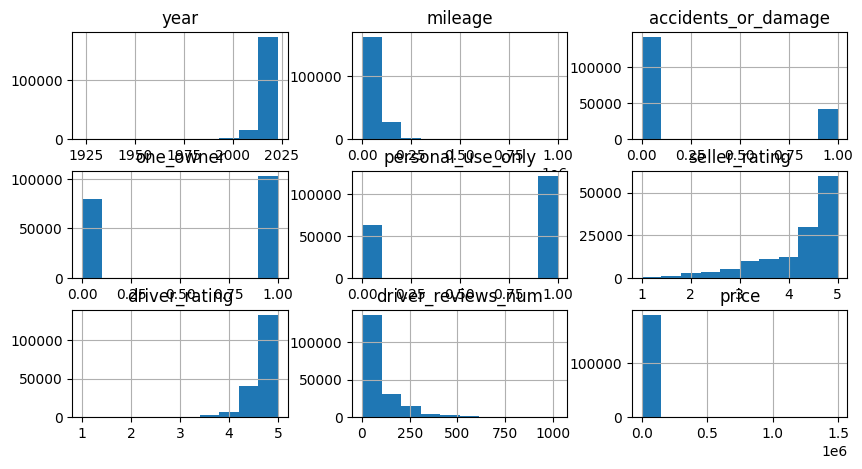

In [31]:
## ANALISANDO A DISTRIBUIÇÃO DOS DADOS NUMÉRICOS COM HISTOGRAMA
numericas.hist(figsize=(10,5))
plt.show()

In [32]:
categoricas

,manufacturer,model,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,seller_name
id,,,,,,,,,,
1,land rover,range rover sport hse dynamic,v6,automatic,four-wheel drive,gasoline,17-23,santorini black,ebony,schaumburg ford
2,nissan,armada sl,5.6l v8 32v gdi dohc,7-speed automatic,rear-wheel drive,gasoline,14-19,black,almond,world auto inc.
3,toyota,tundra 1794,"i-force 5.7l v-8 dohc, vvt-i variable valve co...",automatic,four-wheel drive,gasoline,13-17,silver,brown/black,cal cars
4,toyota,avalon xle,3.5l v6 24v mpfi dohc,6-speed automatic,front-wheel drive,gasoline,21-31,cosmic gray mica,light gray,scanlon lexus
5,mercedes-benz,gls 450 4matic,3.0l i6 24v gdi dohc turbo,9-speed automatic,all-wheel drive,gasoline,NaN,2191,tartufo brown,lupient buick gmc
...,...,...,...,...,...,...,...,...,...,...
190517,hyundai,elantra se,"nu 2l i-4 dohc, d-cvvt variable valve control,...",6-speed automatic,front-wheel drive,gasoline,29-38,lakeside blue,gray,bommarito nissan hazelwood
190518,ram,promaster 1500 low roof,3.0l i4 16v ddi dohc turbo diesel,automatic,front-wheel drive,diesel,NaN,bright white clearcoat,gray,woody's dodge jeep chrysler ram
190519,toyota,highlander,3.5l v6 24v mpfi dohc,5-speed automatic,all-wheel drive,gasoline,17-22,white,beige,trade guru


In [33]:
correlacao_pearson = numericas.corr(method='pearson')
correlacao_pearson

,year,mileage,accidents_or_damage,one_owner,personal_use_only,seller_rating,driver_rating,driver_reviews_num,price
year,1.000000,-0.535459,-0.154639,0.432168,-0.092889,0.172454,0.130623,-0.093945,0.283600
mileage,-0.535459,1.000000,0.239695,-0.382833,-0.036438,-0.170230,-0.096092,0.211768,-0.455800
accidents_or_damage,-0.154639,0.239695,1.000000,-0.166055,0.007055,-0.082182,-0.005811,0.104175,-0.185555
one_owner,0.432168,-0.382833,-0.166055,1.000000,0.087647,0.103757,0.045768,-0.153498,0.197511
personal_use_only,-0.092889,-0.036438,0.007055,0.087647,1.000000,0.022711,0.002298,0.041399,0.013877
seller_rating,0.172454,-0.170230,-0.082182,0.103757,0.022711,1.000000,0.042211,-0.004655,0.110004
driver_rating,0.130623,-0.096092,-0.005811,0.045768,0.002298,0.042211,1.000000,0.052951,0.043254
driver_reviews_num,-0.093945,0.211768,0.104175,-0.153498,0.041399,-0.004655,0.052951,1.000000,-0.274105
price,0.283600,-0.455800,-0.185555,0.197511,0.013877,0.110004,0.043254,-0.274105,1.000000


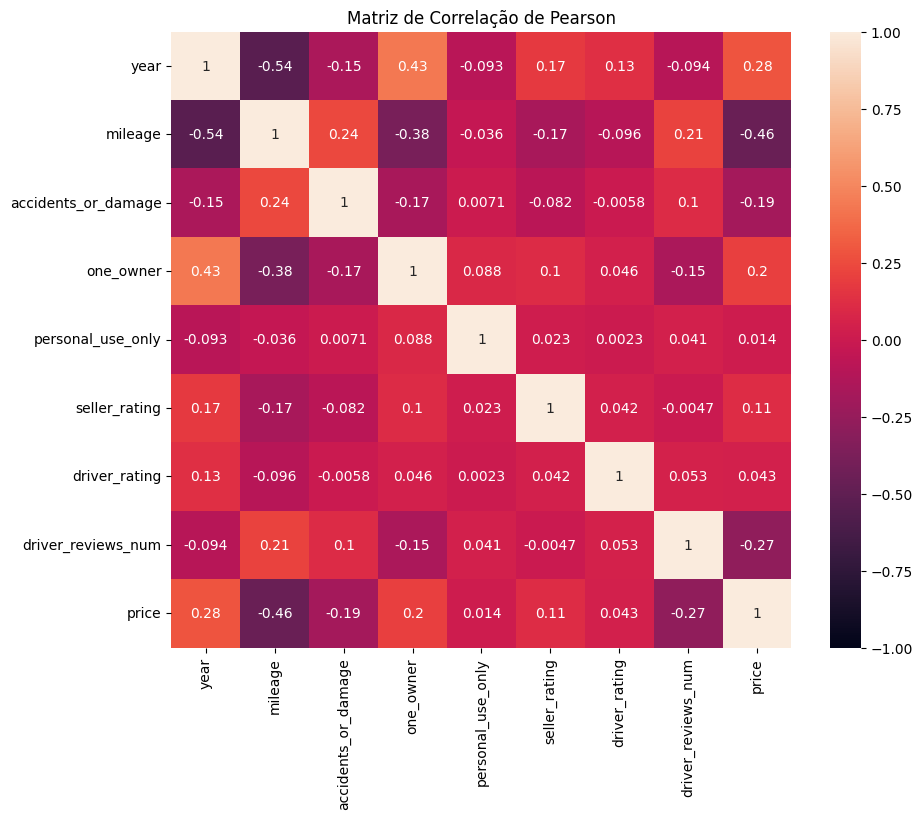

In [34]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao_pearson, annot=True,  vmin=-1, vmax=1)
plt.title('Matriz de Correlação de Pearson')
plt.show()

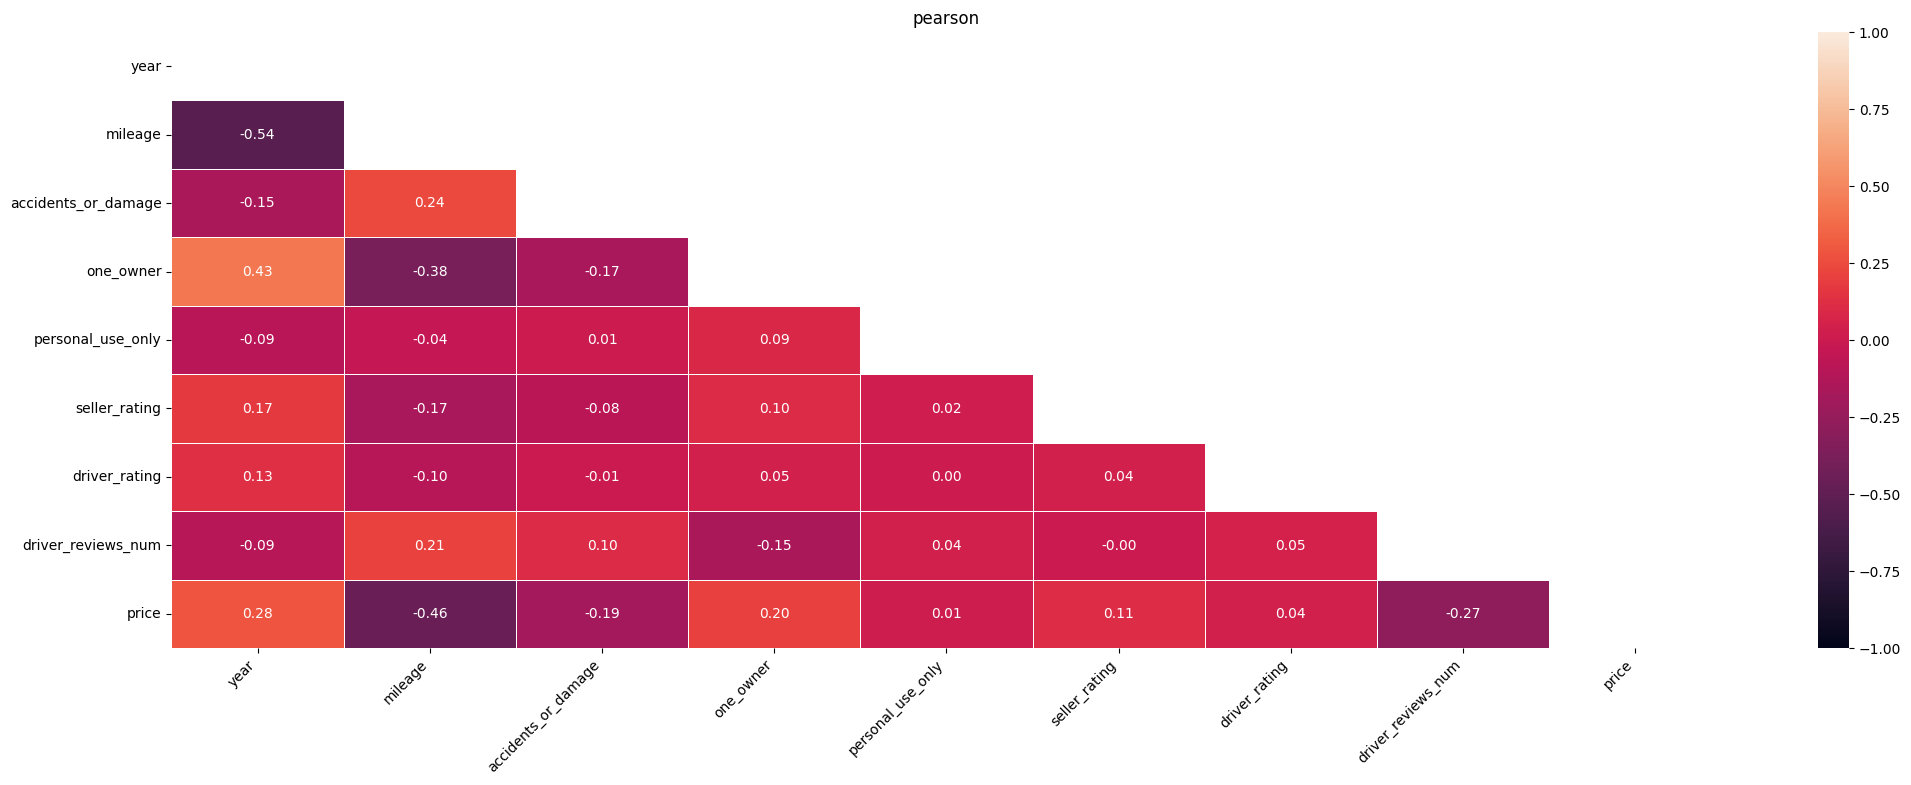

In [35]:
fig, axs = plt.subplots(1,1, figsize=(25, 8), sharey=False)
fig.subplots_adjust(hspace=.5, wspace=1.35)

corr     = numericas.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, vmax=1, vmin=-1, annot=True, square=False, fmt=".2f",linewidths=.5,ax = axs)

axs.set_title("pearson")
axs.set_xticklabels(axs.get_xticklabels(), rotation = 45,ha="right")

plt.show()

In [36]:
# foi identificada que as colunas que mais se relacionam com a coluna "price" 
# são as 'mileage, year, driver_reviews_num, one_owner'
#Copia_Colunas = ['mileage','year','one_owner','price']

### Transformando as colunas categoricas.
* optei pelo trabalho "manual" para diminuir as margens de erro posteriormente

In [37]:
Car_Amostra['fuel_type'].unique()

array(['gasoline', nan, 'diesel', 'hybrid', 'e85 flex fuel', 'electric',
       'gasoline fuel', 'b', 'plug-in hybrid', 'flexible fuel',
       'gasoline/mild electric hybrid', 'compressed natural gas',
       'gaseous', 'regular unleaded', 'g', 'biodiesel', 'hybrid fuel',
       'premium unleaded', 'hydrogen fuel cell', 'diesel fuel',
       'natural gas', 'electric fuel system', 'unspecified', 'gas',
       'phev', 'gas/electric hybrid', 'flex fuel capability'],
      dtype=object)

In [38]:
mapeamento = {
    'gasoline': 'gasolina',
    'diesel': 'gasolina',
    'hybrid': 'hibrido',
    'e85 flex fuel': 'Flex',
    'electric': 'Eletrico',
    'gasoline fuel': 'gasolina',
    'plug-in hybrid': 'hibrido',
    'flexible fuel': 'Flex',
    'gasoline/mild electric hybrid': 'hibrido',
    'compressed natural gas': 'outros',
    'gaseous': 'outros',
    'regular unleaded': 'gasolina',
    'biodiesel': 'gasolina',
    'hybrid fuel': 'hibrido',
    'premium unleaded': 'gasolina',
    'hydrogen fuel cell': 'outros',
    'diesel fuel': 'gasolina',
    'natural gas': 'outros',
    'electric fuel system': 'Eletrico',
    'unspecified': 'outros',
    'gas': 'gas',
    'phev': 'hibrido',
    'gas/electric hybrid': 'hibrido',
    'flex fuel capability': 'Flex'
}

Car_Amostra['fuel_type'] = Car_Amostra['fuel_type'].map(mapeamento).fillna('outros')

In [39]:
Car_Amostra['transmission'].unique()

array(['automatic', '7-speed automatic', '6-speed automatic',
       '9-speed automatic', '8-speed automatic', '10-speed automatic',
       nan, 'automatic cvt', 'automatic with tiptronic', '6-speed manual',
       '4-speed automatic', '6-speed', '5-speed automatic',
       '7-speed automatic with auto-shift', '1-speed automatic',
       '4 speed automatic', '5-speed manual',
       '6-speed automatic with auto-shift', 'ivt', '4-speed a/t',
       'manual', '5-speed m/t', 'variable', 'automatic 5-speed',
       '6-speed shiftable automatic',
       'continuously variable transmission', '6 speed automatic',
       '1-speed cvt with overdrive', '8-speed automatic with auto-shift',
       '8-speed automatic with shiftronic',
       '6-speed dsg automatic with tiptronic', 'automatic, 6-spd',
       'cvt transmission', '8-speed automatic with tiptronic',
       '10-speed transmission', '6-spd auto transmission',
       '6-speed automatic with sequential shift',
       '8-spd auto transmissi

In [40]:
def map_transmission(transmission):
    if pd.isna(transmission):
        return 'desconhecido'
    elif 'auto' in transmission.lower() or 'cvt' in transmission.lower():
        return 'automatico'
    elif 'manual' in transmission.lower() or 'm/t' in transmission.lower():
        return 'manual'
    else:
        return 'desconhecido'

Car_Amostra['transmission'] = Car_Amostra['transmission'].apply(map_transmission)
Car_Amostra

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price
id,,,,,,,,,,,,,,,,,,,
1,land rover,range rover sport hse dynamic,2018,33585.0,v6,automatico,four-wheel drive,gasolina,17-23,santorini black,ebony,0.0,1.0,0.0,schaumburg ford,4.1,4.0,45.0,53950.0
2,nissan,armada sl,2017,63009.0,5.6l v8 32v gdi dohc,automatico,rear-wheel drive,gasolina,14-19,black,almond,0.0,0.0,1.0,world auto inc.,2.3,4.7,78.0,27885.0
3,toyota,tundra 1794,2018,51316.0,"i-force 5.7l v-8 dohc, vvt-i variable valve co...",automatico,four-wheel drive,gasolina,13-17,silver,brown/black,0.0,NaN,1.0,cal cars,4.4,4.8,199.0,46995.0
4,toyota,avalon xle,2015,89444.0,3.5l v6 24v mpfi dohc,automatico,front-wheel drive,gasolina,21-31,cosmic gray mica,light gray,0.0,1.0,1.0,scanlon lexus,4.7,4.7,74.0,17987.0
5,mercedes-benz,gls 450 4matic,2023,2191.0,3.0l i6 24v gdi dohc turbo,automatico,all-wheel drive,gasolina,NaN,2191,tartufo brown,0.0,1.0,1.0,lupient buick gmc,4.5,NaN,0.0,96648.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190517,hyundai,elantra se,2017,52900.0,"nu 2l i-4 dohc, d-cvvt variable valve control,...",automatico,front-wheel drive,gasolina,29-38,lakeside blue,gray,0.0,0.0,0.0,bommarito nissan hazelwood,4.8,4.7,640.0,16995.0
190518,ram,promaster 1500 low roof,2015,45195.0,3.0l i4 16v ddi dohc turbo diesel,automatico,front-wheel drive,gasolina,NaN,bright white clearcoat,gray,0.0,0.0,1.0,woody's dodge jeep chrysler ram,4.6,4.1,5.0,54870.0
190519,toyota,highlander,2013,160000.0,3.5l v6 24v mpfi dohc,automatico,all-wheel drive,gasolina,17-22,white,beige,0.0,1.0,1.0,trade guru,3.4,4.7,140.0,13991.0


In [41]:
Car_Amostra['transmission'].unique()

array(['automatico', 'desconhecido', 'manual'], dtype=object)

In [42]:
Car_Amostra.drop(columns=['mpg', 'interior_color', 'driver_rating', 'personal_use_only', 'drivetrain', 'engine', 'exterior_color', 'driver_reviews_num','model'], inplace=True)
Car_Amostra


,manufacturer,year,mileage,transmission,fuel_type,accidents_or_damage,one_owner,seller_name,seller_rating,price
id,,,,,,,,,,
1,land rover,2018,33585.0,automatico,gasolina,0.0,1.0,schaumburg ford,4.1,53950.0
2,nissan,2017,63009.0,automatico,gasolina,0.0,0.0,world auto inc.,2.3,27885.0
3,toyota,2018,51316.0,automatico,gasolina,0.0,NaN,cal cars,4.4,46995.0
4,toyota,2015,89444.0,automatico,gasolina,0.0,1.0,scanlon lexus,4.7,17987.0
5,mercedes-benz,2023,2191.0,automatico,gasolina,0.0,1.0,lupient buick gmc,4.5,96648.0
...,...,...,...,...,...,...,...,...,...,...
190517,hyundai,2017,52900.0,automatico,gasolina,0.0,0.0,bommarito nissan hazelwood,4.8,16995.0
190518,ram,2015,45195.0,automatico,gasolina,0.0,0.0,woody's dodge jeep chrysler ram,4.6,54870.0
190519,toyota,2013,160000.0,automatico,gasolina,0.0,1.0,trade guru,3.4,13991.0


In [43]:
# Transformando a Coluna 'Seller_rating' em coluna numerica e substituindo dados nulos pela media de avaliação
Car_Amostra['seller_rating'] = pd.to_numeric(Car_Amostra['seller_rating'], errors='coerce')
Car_Amostra['seller_rating'] = Car_Amostra['seller_rating'].fillna(Car_Amostra['seller_rating'].mean())
#dropando os dados nulos dos restantes das colunas
Car_Amostra.dropna(inplace=True)

In [44]:
(Car_Amostra.isnull().sum()/len(Car_Amostra)*100).sort_values(ascending = False)

manufacturer           0.0
year                   0.0
mileage                0.0
transmission           0.0
fuel_type              0.0
accidents_or_damage    0.0
one_owner              0.0
seller_name            0.0
seller_rating          0.0
price                  0.0
dtype: float64

In [45]:
Car_Amostra.dtypes

manufacturer            object
year                     int64
mileage                float64
transmission            object
fuel_type               object
accidents_or_damage    float64
one_owner              float64
seller_name             object
seller_rating          float64
price                  float64
dtype: object

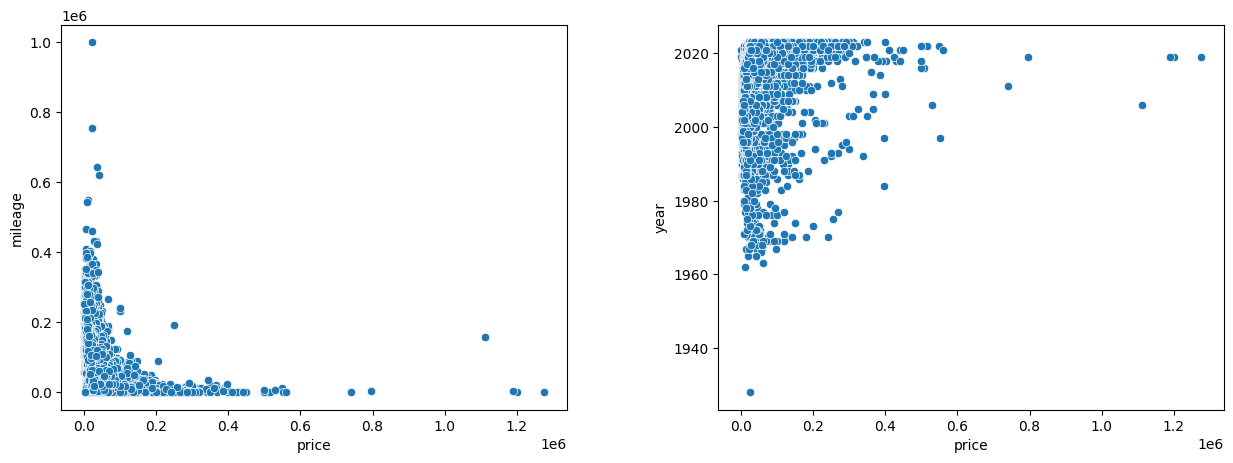

In [46]:
 ## ANALISANDO RELAÇÃO ENTRE AS VARIÁVEIS

fig, axs = plt.subplots(1,2,figsize=(15,5))
fig.subplots_adjust(hspace = .3, wspace=.3)
sns.scatterplot(x='price',y='mileage',data=Car_Amostra,ax=axs[0])
sns.scatterplot(x='price',y='year',data=Car_Amostra,ax=axs[1])  # Corrigido: use 'sns.scatterplot'
plt.show()

In [47]:
#analisando outliers "price"
Car_Amostra[Car_Amostra['price'] >= 1000000]

,manufacturer,year,mileage,transmission,fuel_type,accidents_or_damage,one_owner,seller_name,seller_rating,price
id,,,,,,,,,,
12179,cadillac,2006,158021.0,automatico,gasolina,0.0,0.0,greve chrysler dodge jeep ram,3.400000,1111111.0
76346,porsche,2019,134.0,automatico,gasolina,0.0,1.0,oc autosource,4.160474,1200888.0
169785,ford,2019,3215.0,automatico,gasolina,0.0,0.0,mercedes-benz of easton,4.600000,1190000.0
185946,ford,2019,255.0,automatico,gasolina,0.0,0.0,marino performance motors,4.160474,1275000.0


In [48]:
Car_Amostra = Car_Amostra[Car_Amostra['price'] < 1000000]
Car_Amostra[Car_Amostra['price'] >= 1000000]

,manufacturer,year,mileage,transmission,fuel_type,accidents_or_damage,one_owner,seller_name,seller_rating,price
id,,,,,,,,,,


In [49]:
Car_Amostra.sort_values(by='mileage', ascending=False)

,manufacturer,year,mileage,transmission,fuel_type,accidents_or_damage,one_owner,seller_name,seller_rating,price
id,,,,,,,,,,
114729,lincoln,1967,999999.0,automatico,gasolina,0.0,1.0,gr auto gallery,3.200000,22900.0
63079,honda,2020,754680.0,automatico,gasolina,0.0,1.0,florida fine cars margate,5.000000,20499.0
126119,land rover,2016,644736.0,automatico,gasolina,0.0,0.0,u car connect,4.160474,34777.0
180179,ford,2016,620637.0,automatico,outros,1.0,1.0,cornhusker nissan of norfolk,4.160474,39990.0
84068,ford,2017,549013.0,automatico,gasolina,1.0,1.0,east coast auto source,1.800000,11795.0
...,...,...,...,...,...,...,...,...,...,...
31850,honda,2006,0.0,automatico,gasolina,0.0,0.0,your choice autos waukegan,4.200000,2200.0
2328,volkswagen,2010,0.0,manual,gasolina,1.0,0.0,beach blvd automotive,1.600000,3988.0
85775,dodge,2009,0.0,automatico,gasolina,1.0,0.0,settle auto sales (taylor street),4.160474,4999.0


In [50]:
Car_Amostra[Car_Amostra['year'] <= 1940]

,manufacturer,year,mileage,transmission,fuel_type,accidents_or_damage,one_owner,seller_name,seller_rating,price
id,,,,,,,,,,
65593,ford,1928,1754.0,manual,gasolina,0.0,0.0,gr auto gallery,3.1,24900.0


In [51]:
Car_Amostra = Car_Amostra.drop(65593)

In [52]:
Car_Amostra[Car_Amostra['year'] <= 1940]

,manufacturer,year,mileage,transmission,fuel_type,accidents_or_damage,one_owner,seller_name,seller_rating,price
id,,,,,,,,,,


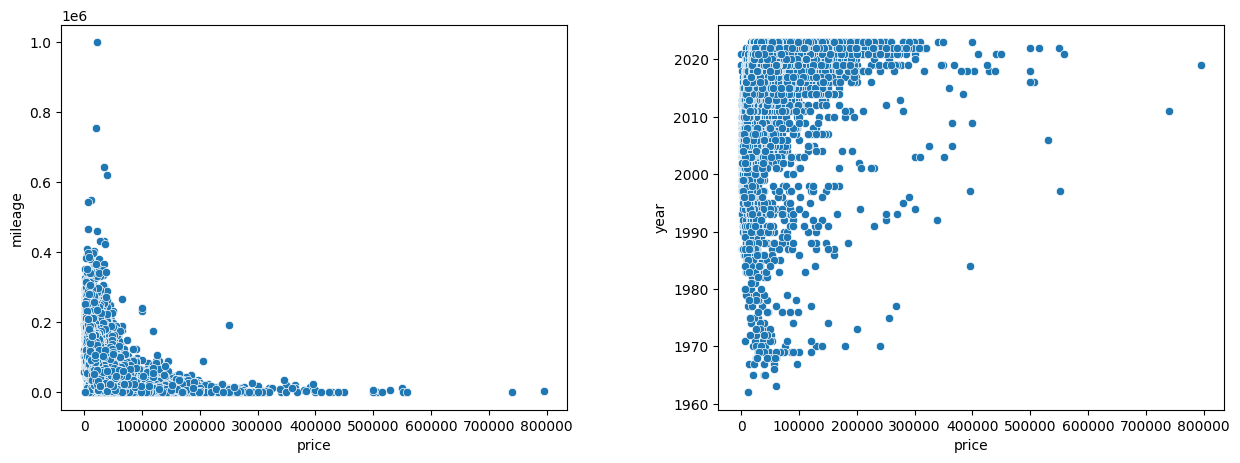

In [53]:
## ANALISANDO novamente para observar os outliers

fig, axs = plt.subplots(1,2,figsize=(15,5))
fig.subplots_adjust(hspace = .3, wspace=.3)
sns.scatterplot(x='price',y='mileage',data=Car_Amostra,ax=axs[0])
sns.scatterplot(x='price',y='year',data=Car_Amostra,ax=axs[1])
plt.show()

pd.plotting.scatter_matrix(Car_Amostra, figsize=(30,20))
plt.show()

In [54]:
dummies_cambio_combustivel = pd.get_dummies(Car_Amostra[['transmission','fuel_type']], prefix='', prefix_sep='').astype(int)
dummies_cambio_combustivel

,automatico,desconhecido,manual,Eletrico,Flex,gas,gasolina,hibrido,outros
id,,,,,,,,,
1,1,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,1,0,0
5,1,0,0,0,0,0,1,0,0
6,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
190517,1,0,0,0,0,0,1,0,0
190518,1,0,0,0,0,0,1,0,0
190519,1,0,0,0,0,0,1,0,0


In [55]:
Car_Amostra.head(1)

,manufacturer,year,mileage,transmission,fuel_type,accidents_or_damage,one_owner,seller_name,seller_rating,price
id,,,,,,,,,,
1,land rover,2018,33585.0,automatico,gasolina,0.0,1.0,schaumburg ford,4.1,53950.0


In [56]:
df_metadados_final = pd.concat([Car_Amostra[['year', 'mileage', 'accidents_or_damage','one_owner','price']],
                                dummies_cambio_combustivel],axis=1)
df_metadados_final

,year,mileage,accidents_or_damage,one_owner,price,automatico,desconhecido,manual,Eletrico,Flex,gas,gasolina,hibrido,outros
id,,,,,,,,,,,,,,
1,2018,33585.0,0.0,1.0,53950.0,1,0,0,0,0,0,1,0,0
2,2017,63009.0,0.0,0.0,27885.0,1,0,0,0,0,0,1,0,0
4,2015,89444.0,0.0,1.0,17987.0,1,0,0,0,0,0,1,0,0
5,2023,2191.0,0.0,1.0,96648.0,1,0,0,0,0,0,1,0,0
6,2019,66484.0,1.0,0.0,26899.0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190517,2017,52900.0,0.0,0.0,16995.0,1,0,0,0,0,0,1,0,0
190518,2015,45195.0,0.0,0.0,54870.0,1,0,0,0,0,0,1,0,0
190519,2013,160000.0,0.0,1.0,13991.0,1,0,0,0,0,0,1,0,0


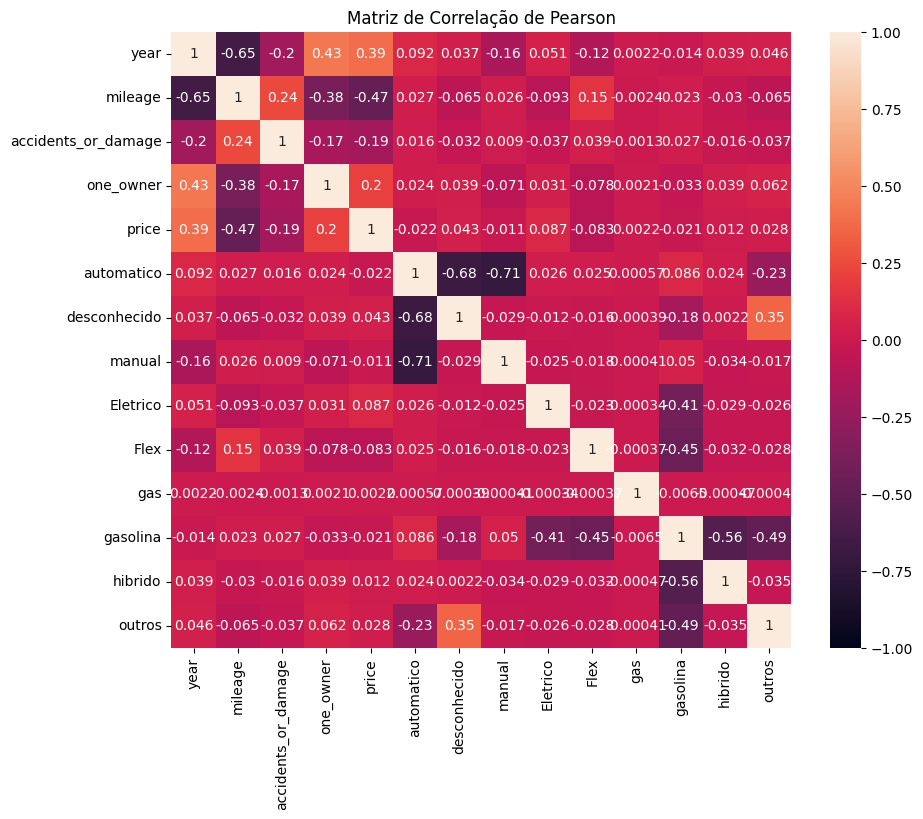

In [57]:
correlacao     = df_metadados_final.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True,  vmin=-1, vmax=1)
plt.title('Matriz de Correlação de Pearson')
plt.show()

#### Melhores Correlação
mileage: -0.474372 (correlação negativa) ,year: 0.387124 (correlação positiva), one_owner: 0.204019 (correlação positiva), accidents_or_damage: -0.192068 (correlação negativa)

In [58]:
# Aplicando Normalização Logaritma
df_metadados_final.loc[:, 'PRICE_LOG'] = np.log(df_metadados_final.price + 1)
df_metadados_final.loc[:, 'MILEAGE_LOG'] = np.log(df_metadados_final.mileage + 1)
df_metadados_final.loc[:, 'YEAR_LOG'] = np.log(df_metadados_final.year + 1)

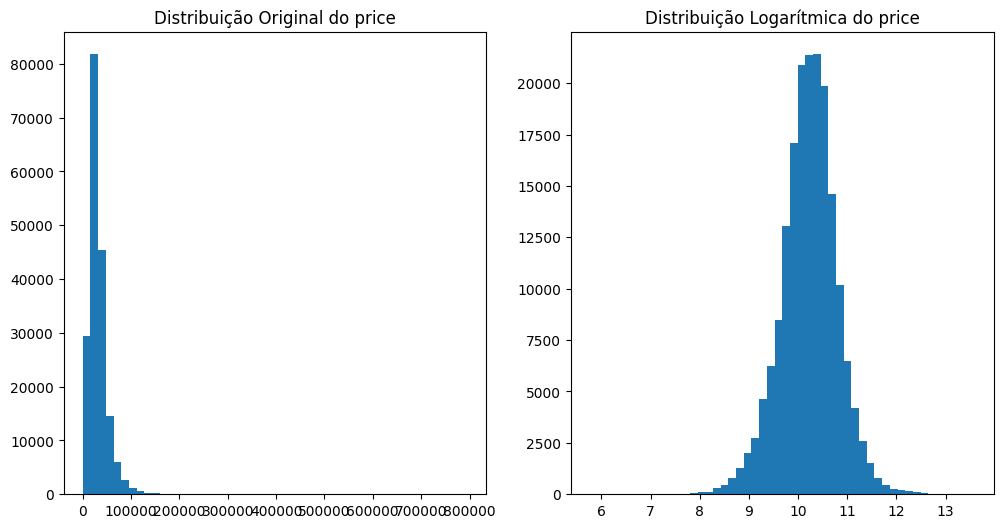

In [59]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df_metadados_final['price'], bins=50)
plt.title('Distribuição Original do price')

plt.subplot(1, 2, 2)
plt.hist(df_metadados_final['PRICE_LOG'], bins=50)
plt.title('Distribuição Logarítmica do price')

plt.show()

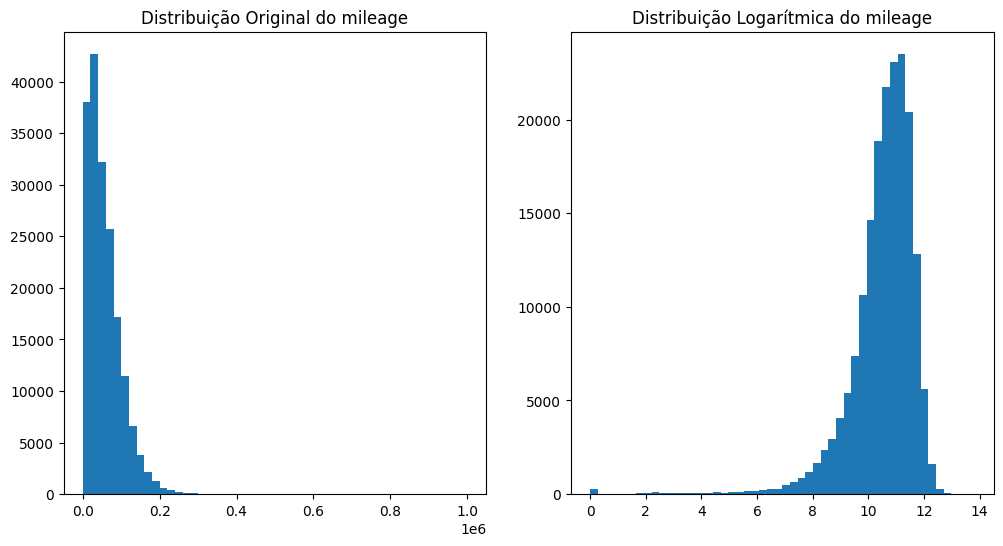

In [60]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df_metadados_final['mileage'], bins=50)
plt.title('Distribuição Original do mileage')

plt.subplot(1, 2, 2)
plt.hist(df_metadados_final['MILEAGE_LOG'], bins=50)
plt.title('Distribuição Logarítmica do mileage')

plt.show()

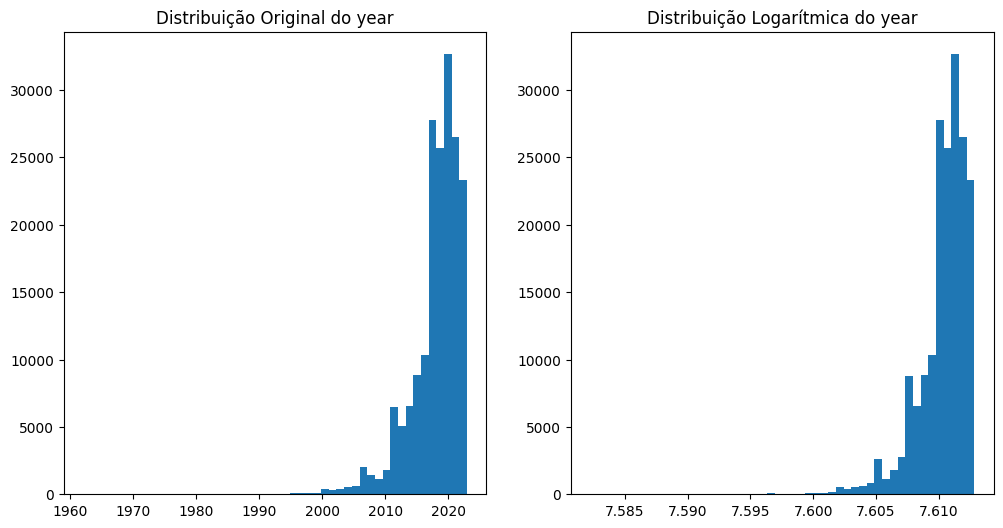

In [61]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df_metadados_final['year'], bins=50)
plt.title('Distribuição Original do year')

plt.subplot(1, 2, 2)
plt.hist(df_metadados_final['YEAR_LOG'], bins=50)
plt.title('Distribuição Logarítmica do year')

plt.show()

#### Percebe-se uma melhora na distribuição do 'price' com a aplicação da normalização.

## MODELO ML

In [62]:
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#### DEFININDO BASE TREINO E TESTE
* Selecionando os atriutos para X e Y
* Os atributos foram selecionados com base nas análise de correlação feita na análise exploratória.

In [63]:
## CRIANDO LISTA COM AS COLUNAS QUE SERÃO EXCLUÍDAS
drop_colunas_x = ['price','PRICE_LOG','manual','hibrido','gas','Eletrico','outros','one_owner','accidents_or_damage','desconhecido']

dados_modelo = df_metadados_final.copy()

## DIVIDINDO X E Y 
# apenas valores originais
x = dados_modelo.drop(columns=drop_colunas_x+['MILEAGE_LOG','YEAR_LOG']) #excluindo variaveis LOG
y = dados_modelo.price

# apenas valores log
x_log = dados_modelo.drop(columns=drop_colunas_x+['mileage','year'])
y_log = dados_modelo.PRICE_LOG

## DIVIDINDO BASE TEM TREINO(70%) E TESTE(30%)
x_treino, x_teste,y_treino,y_teste = train_test_split(x,y,test_size=.3,random_state=1234)

x_treino_log, x_teste_log,y_treino_log,y_teste_log = train_test_split(x_log,y_log,test_size=.3,random_state=1234)

x_treino.columns,x_treino_log.columns

(Index(['year', 'mileage', 'automatico', 'Flex', 'gasolina'], dtype='object'),
 Index(['automatico', 'Flex', 'gasolina', 'MILEAGE_LOG', 'YEAR_LOG'], dtype='object'))

In [64]:
## LISTA PRA ARMAZENAR O VALOR DA MÉTRICA(R²) DOS MODELOS
resultados = []

## MODELO COM DADOS VALORES ABSOLUTOS
lr = LinearRegression()
lr.fit(x_treino,y_treino)
resultados.append( ('lr',lr.score(x_teste,y_teste)) ) #GERANDO O R² E SALVANDO NA LISTA DE RESULTADOS

## MODELO COM DADOS VALORES NORMALIZADOS COM LOG
lr_log = LinearRegression()
lr_log.fit(x_treino_log,y_treino_log)
resultados.append( ('lr_log',lr_log.score(x_teste_log,y_teste_log)) )

print("Métrica R²")
print(lr.score(x_teste,y_teste))
print(lr_log.score(x_teste_log,y_teste_log))

Métrica R²
0.2315191805442781
0.42579161688806044


<Axes: >

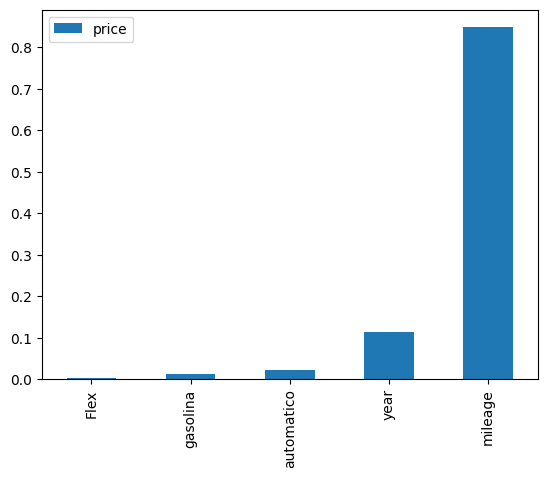

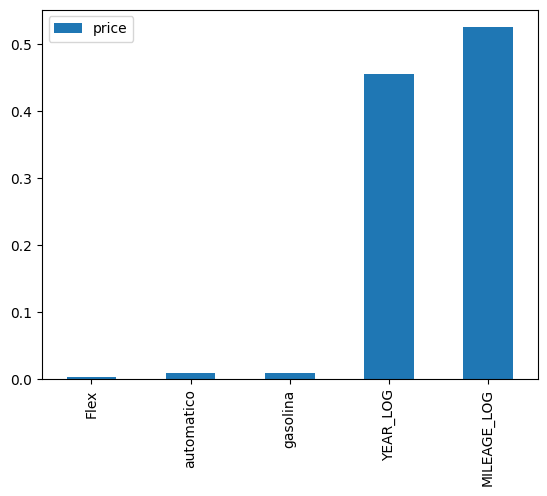

In [65]:
## MODELO COM DADOS VALORES ABSOLUTOS
dtr = DecisionTreeRegressor()
dtr.fit(x_treino,y_treino)
resultados.append( ('dtr', dtr.score(x_teste,y_teste)) )

## MODELO COM DADOS VALORES NORMALIZADOS COM LOG
dtr_log = DecisionTreeRegressor()
dtr_log.fit(x_treino_log,y_treino_log)
resultados.append( ('dtr_log', dtr_log.score(x_teste_log,y_teste_log)) )

## VARIÁVEIS IMPORTANTES DO MODELO
pd.DataFrame(index=x_treino.columns,data=dtr.feature_importances_,columns=['price']).sort_values('price').plot(kind='bar')
pd.DataFrame(index=x_treino_log.columns,data=dtr_log.feature_importances_,columns=['price']).sort_values('price').plot(kind='bar')

<Axes: >

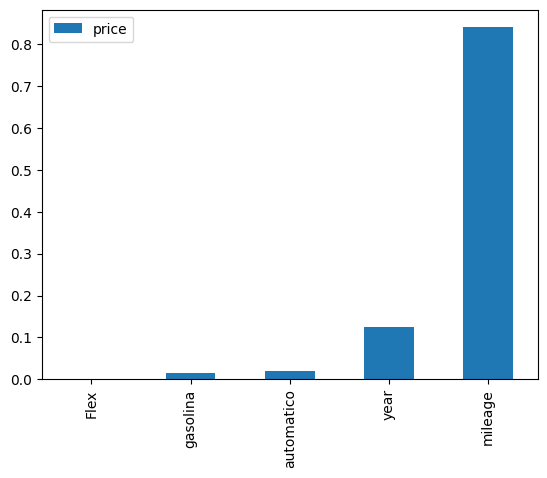

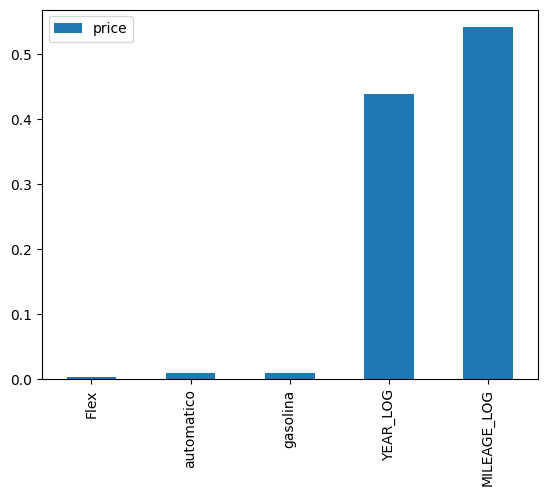

In [66]:
## MODELO COM DADOS VALORES ABSOLUTOS
rfr = RandomForestRegressor()
rfr.fit(x_treino,y_treino)
resultados.append( ('rfr', rfr.score(x_teste,y_teste)) )

## MODELO COM DADOS VALORES NORMALIZADOS COM LOG
rfr_log = RandomForestRegressor()
rfr_log.fit(x_treino_log,y_treino_log)
resultados.append( ('rfr_log', rfr_log.score(x_teste_log,y_teste_log)) ) 

## VARIÁVEIS IMPORTANTES DO MODELO
pd.DataFrame(index=x_treino.columns,data=rfr.feature_importances_,columns=['price']).sort_values('price').plot(kind='bar')
pd.DataFrame(index=x_treino_log.columns,data=rfr_log.feature_importances_,columns=['price']).sort_values('price').plot(kind='bar')

# VALIDANDO MODELO

-0.3654239331101721 0.42579161688806044


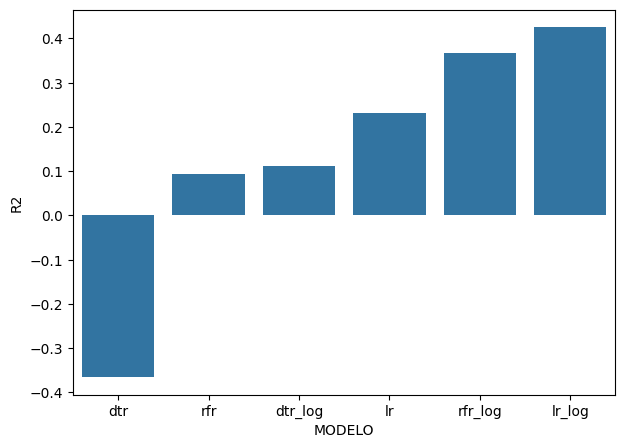

In [67]:
plt.figure(figsize=(7,5))

## GERANDO DATAFRAME COM A LISTA DOS RESULTADO (R²)
df_resultados = pd.DataFrame(resultados,columns=['MODELO','R2'])

print(df_resultados.R2.min(), df_resultados.R2.max())

sns.barplot(x='MODELO',y='R2',data = df_resultados.sort_values('R2'))
plt.show()

In [68]:
#dtr = DecisionTreeRegressor
#dtr_log = DecisionTreeRegressor(Com LOG)
#rfr = RandomForestRegressor
#rfr_log = RandomForestRegressor(Com LOG)
#lr = LinearRegression
#lr_log = LinearRegression(Com LOG)}

 

DecisionTreeRegressor com os valores absolutos (sem normalização) obteve o pior resultado , ja a Regressão linear com valores normalizados obteve o melhor resultado
* top 1 - Regressão linear(Com LOG)
* top 2 - RandomForestRegressor(Com LOG)

In [69]:
## SELECIONANDO i REGISTROS PARA FAZER PREDIÇÃO COM O MELHOR MODELO
# DE ACORDO COM ANÁLISE ANTERIOR
i = 150
modelo_final = LinearRegression()
modelo_final.fit(x_treino_log,y_treino_log)

## GERANDO INDEX PARA GERAR O GRÁFICO
index = range(len(x_teste_log[:i]))

## FAZENDO PREDIÇÃO NA BASE DE TESTE
pred = modelo_final.predict(x_teste_log[:i])
pred[:10]
     

array([10.21568703, 10.37785369,  9.66555199, 10.33634871,  9.54710959,
       10.48871388, 10.18530618,  9.91344354, 10.58361628, 10.22152294])

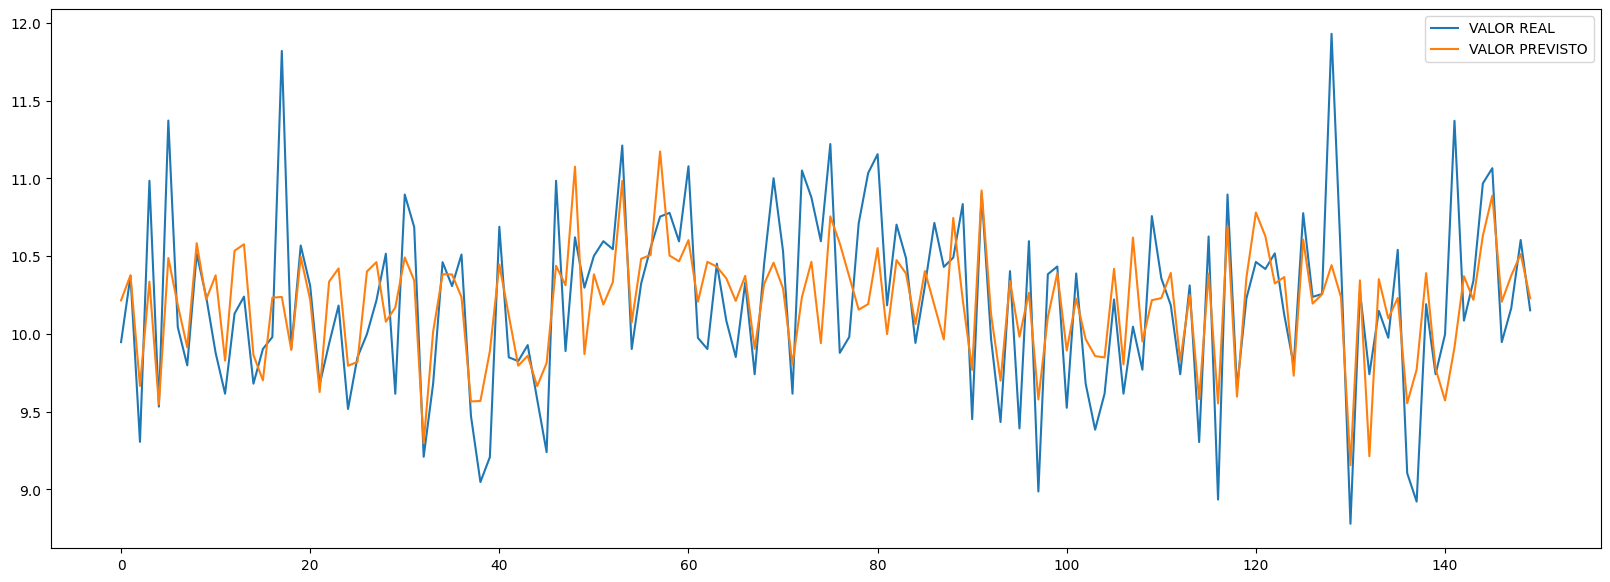

In [70]:
## VISUALIZANDO VALORES REAIS E PREVISTOS EM LOG
plt.figure(figsize=(20,7))
plt.plot(index, y_teste_log[:i],label='real')
plt.plot(index, pred,label='previsto')
plt.legend(['VALOR REAL','VALOR PREVISTO'])
plt.show()

In [71]:
## CONVERTENDO VALOR LOG PARA VALOR ORIGINAL
# BASTA USAR O EXPONENCIAL(np.ex())
for x in zip(pred[:10], np.exp(pred)[:10]):
  print(f"VALOR LOG: {x[0]} - VALOR NORMAL: {round(x[1])}")

VALOR LOG: 10.215687032824349 - VALOR NORMAL: 27329
VALOR LOG: 10.377853688084315 - VALOR NORMAL: 32140
VALOR LOG: 9.665551992868131 - VALOR NORMAL: 15765
VALOR LOG: 10.33634870983451 - VALOR NORMAL: 30833
VALOR LOG: 9.547109585951489 - VALOR NORMAL: 14004
VALOR LOG: 10.488713884932963 - VALOR NORMAL: 35908
VALOR LOG: 10.185306184183332 - VALOR NORMAL: 26511
VALOR LOG: 9.913443542082973 - VALOR NORMAL: 20200
VALOR LOG: 10.583616280649721 - VALOR NORMAL: 39483
VALOR LOG: 10.221522939785928 - VALOR NORMAL: 27488


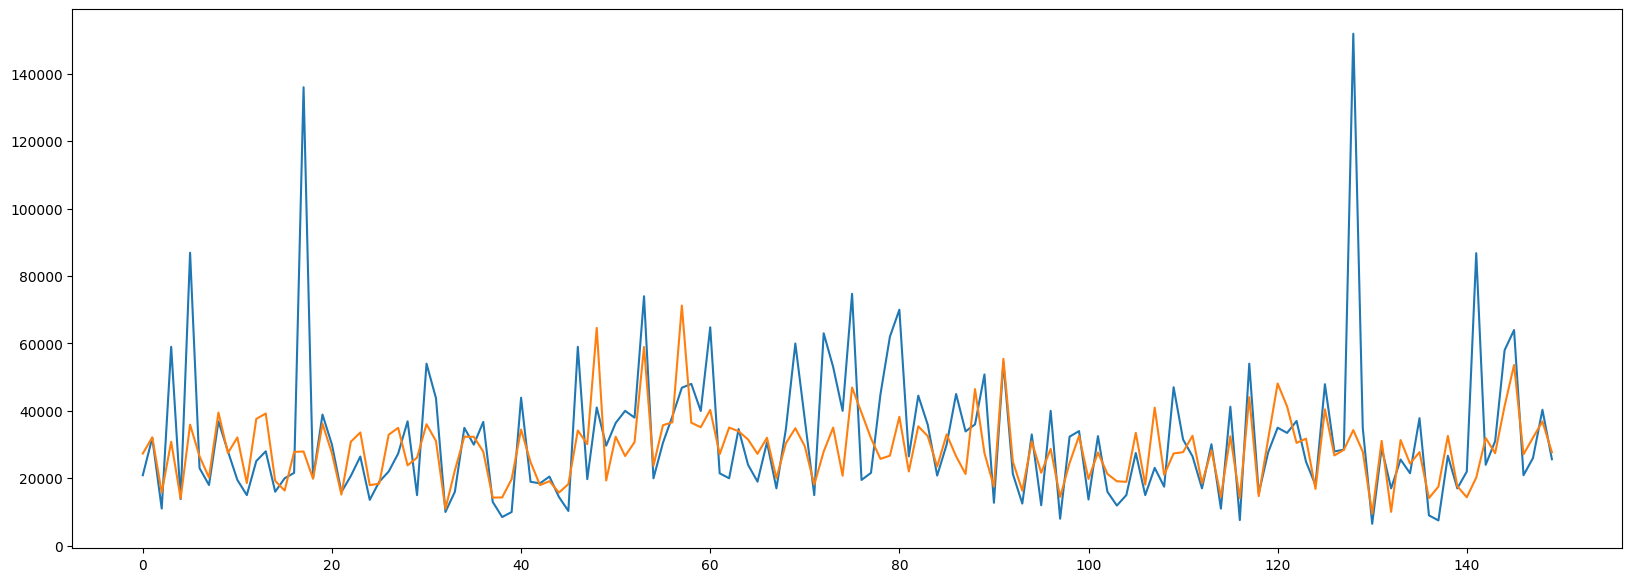

In [72]:
## VISUALIZANDO VALORES REAIS E PREVISTOS ORIGINAIS
plt.figure(figsize=(20,7))
plt.plot(index, np.exp(y_teste_log[:i]),label='real')
plt.plot(index, np.exp(pred),label='previsto')
plt.show()

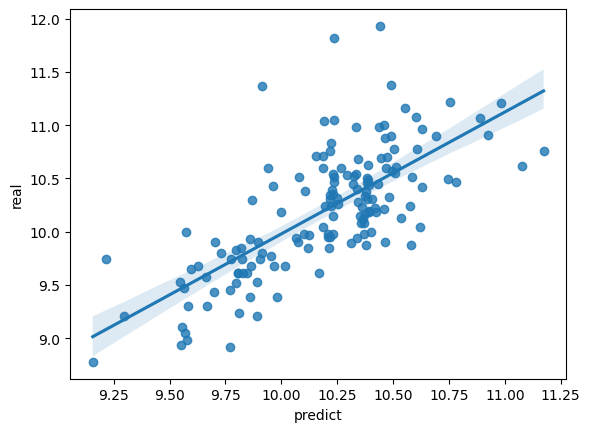

In [73]:
## GERANDO UMA REGRESSÃO
i = 150
pred = modelo_final.predict(x_teste_log[:i])

sns.regplot(x=pred,y=y_teste_log[:i])

plt.xlabel('predict')
plt.ylabel('real')
plt.show()

#### VARIAVEIS IMPORTANTES
* Análise para verificar quais variáveis foram importantes para o modelo.
* Quanto mais perto de 0, menos significante é a variável para o modelo.

In [74]:
importances = pd.DataFrame(data={
    'attr': x_treino_log.columns,
    'importance': modelo_final.coef_
})

importances = importances.sort_values(by='importance', ascending=False)
importances

,attr,importance
4,YEAR_LOG,123.999703
2,gasolina,-0.027209
0,automatico,-0.042317
1,Flex,-0.146557
3,MILEAGE_LOG,-0.147216


<Axes: xlabel='attr', ylabel='importance'>

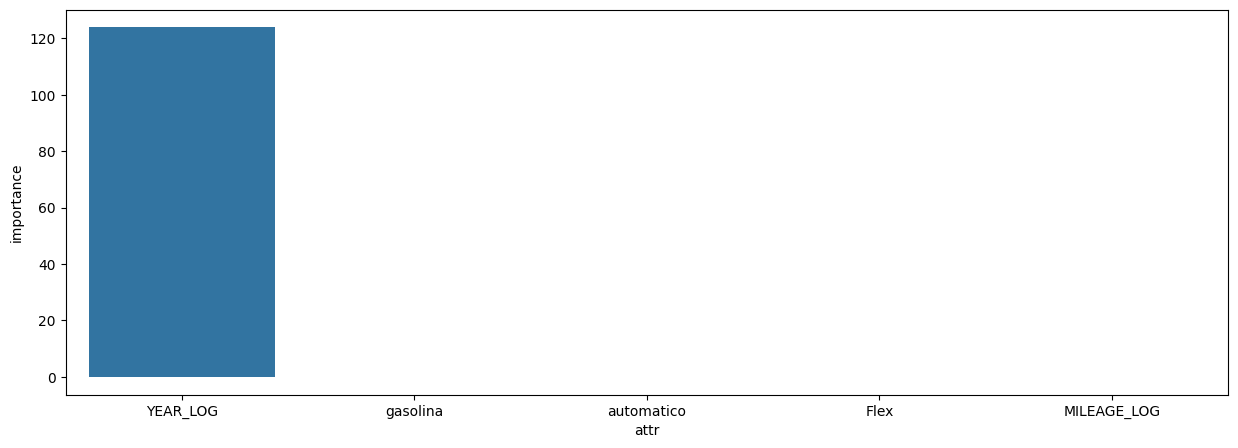

In [75]:
plt.figure(figsize=(15,5))
sns.barplot(x = 'attr',y = 'importance',data = importances)

### Foi indentificado como 'importante' as variaveis , Year(normalizado) e MILEAGE(normalizado)
em resumo o ano e a quilometragem do veiculo são as condições que mais afetam o valor do carro , com base na matriz de correlação de pearson e no teste de variavel podemos concluir isso.